# Data acquisition

The [National Database of Antibiotic Resistant Organisms (NDARO)](../../../data-sources/ndaro) provides a useful [web interface][ndaro-isolates] to browse pathogens that have annotated data concerning the antibiotic resistance profile.
Based on my selection criteria I found over than 3000 samples.

[ndaro-isolates]: https://www.ncbi.nlm.nih.gov/pathogens/isolates

In [1]:
import os
from datetime import datetime
import json
import yaml
from dotenv import load_dotenv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


load_dotenv()

True

In [2]:
CSV_PATH_ISOLATE = os.environ["GENOMICS_CHECKPOINT_CSV_PATH"]

df_isolate = pd.read_csv(CSV_PATH_ISOLATE)

In [3]:
print(df_isolate.columns)

Index(['#Organism group', 'Strain', 'Isolate identifiers', 'Serovar',
       'Isolate', 'Create date', 'Location', 'Isolation source',
       'Isolation type', 'AST phenotypes', 'Food origin', 'SNP cluster',
       'Min-same', 'Min-diff', 'BioSample', 'Assembly', 'AMR genotypes',
       'Computed types'],
      dtype='object')


In [4]:
print(df_isolate.iloc[0])

#Organism group                                      E.coli and Shigella
Strain                                                               NaN
Isolate identifiers                   "0000-0053-1977","60","SRS1016975"
Serovar                                                              NaN
Isolate                                                   PDT000077409.3
Create date                                         2015-12-01T23:21:05Z
Location                                                      USA:Boston
Isolation source                                                   blood
Isolation type                                                  clinical
AST phenotypes         amikacin=S,amoxicillin-clavulanic acid=I,ampic...
Food origin                                                          NaN
SNP cluster                                              PDS000003052.12
Min-same                                                             4.0
Min-diff                                           


Here, we generate a [histogram][mpl-hist] of when these samples were collected.

[mpl-hist]: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html

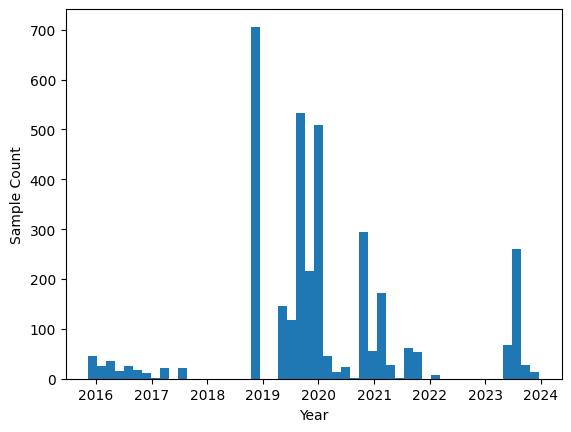

In [5]:
isolate_dates = df_isolate["Create date"].map(
    lambda dt: datetime.strptime(dt, "%Y-%m-%dT%H:%M:%SZ")
)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(isolate_dates, align="mid", bins=50)

ax.set_xlabel("Year")
ax.set_ylabel("Sample Count")

plt.show()